# EDA

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8) 

In [2]:
df= pd.read_csv("datos/bikes.csv", index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,spring,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
df.shape

(730, 16)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [7]:
print(len(df.describe().T))

14


In [8]:
df.describe(include="object").T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


In [9]:
df.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Valores únicos

In [10]:
df_categoricas = df.select_dtypes(include="object")

In [11]:
# Creamos un Dataframe a partir de un diccionario.
# Creamos dos listas para meter el nombre de la variable y los valores unicos
variable = []
n_uniques = []
for col in df_categoricas.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_categoricas[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_valoresunicos = pd.DataFrame.from_dict(datos)
df_valoresunicos

,variable,n_uniques
0,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201..."
1,season,"[spring, summer, autumn, winter]"


In [12]:
df_agrupadas = df[['holiday', 'weekday',
       'workingday', 'weathersit']]
df_agrupadas.head()

,holiday,weekday,workingday,weathersit
0,0,6,0,2
1,0,0,0,2
2,0,1,1,1
3,0,2,1,1
4,0,3,1,1


In [13]:
# Creamos un Dataframe a partir de un diccionario.
# Creamos dos listas para meter el nombre de la variable y los valores unicos
variable = []
n_uniques = []
for col in df_agrupadas.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_agrupadas[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_unicosagrupadas = pd.DataFrame.from_dict(datos)
df_unicosagrupadas

,variable,n_uniques
0,holiday,"[0, 1]"
1,weekday,"[6, 0, 1, 2, 3, 4, 5]"
2,workingday,"[0, 1]"
3,weathersit,"[2, 1, 3]"


In [20]:
df_agrupadas.dtypes

holiday       int64
weekday       int64
workingday    int64
weathersit    int64
dtype: object

In [22]:
semana= pd.crosstab(df["weekday"],df["workingday"] , margins=False)
semana

workingday,0,1
weekday,,
0,105,0
1,15,90
2,1,103
3,1,102
4,2,102
5,2,102
6,105,0


Sábado 6 
Domingo 0

## Duplicados

In [14]:
df.duplicated().sum()

0

## Nulos

In [15]:
df.stb.missing()

,missing,total,percent
instant,0,730,0.0
dteday,0,730,0.0
season,0,730,0.0
yr,0,730,0.0
mnth,0,730,0.0
holiday,0,730,0.0
weekday,0,730,0.0
workingday,0,730,0.0
weathersit,0,730,0.0
temp,0,730,0.0


## Frecuencia de Season

In [23]:
df.stb.freq(["season"], thresh=100)

,season,count,percent,cumulative_count,cumulative_percent
0,autumn,188,25.753425,188,25.753425
1,summer,184,25.205479,372,50.958904
2,spring,180,24.657534,552,75.616438
3,winter,178,24.383562,730,100.000000


In [24]:
df.stb.freq(["season", "dteday"], thresh=100)

,season,dteday,count,percent,cumulative_count,cumulative_percent
0,winter,31-10-2019,1,0.136986,1,0.136986
1,winter,31-10-2018,1,0.136986,2,0.273973
2,winter,30-11-2019,1,0.136986,3,0.410959
3,winter,30-11-2018,1,0.136986,4,0.547945
4,winter,30-10-2019,1,0.136986,5,0.684932
...,...,...,...,...,...,...
725,autumn,01-09-2018,1,0.136986,726,99.452055
726,autumn,01-08-2019,1,0.136986,727,99.589041
727,autumn,01-08-2018,1,0.136986,728,99.726027
728,autumn,01-07-2019,1,0.136986,729,99.863014


In [25]:
seasons= pd.crosstab(df['season'],df['mnth'] , margins=False)
seasons

mnth,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
autumn,0,0,0,0,0,20,62,62,44,0,0,0
spring,62,56,40,0,0,0,0,0,0,0,0,22
summer,0,0,22,60,62,40,0,0,0,0,0,0
winter,0,0,0,0,0,0,0,0,16,62,60,40


Estaciones no coinciden los meses

In [17]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Detección de outliers

In [18]:
df_numericas = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
df_numericas.head(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801


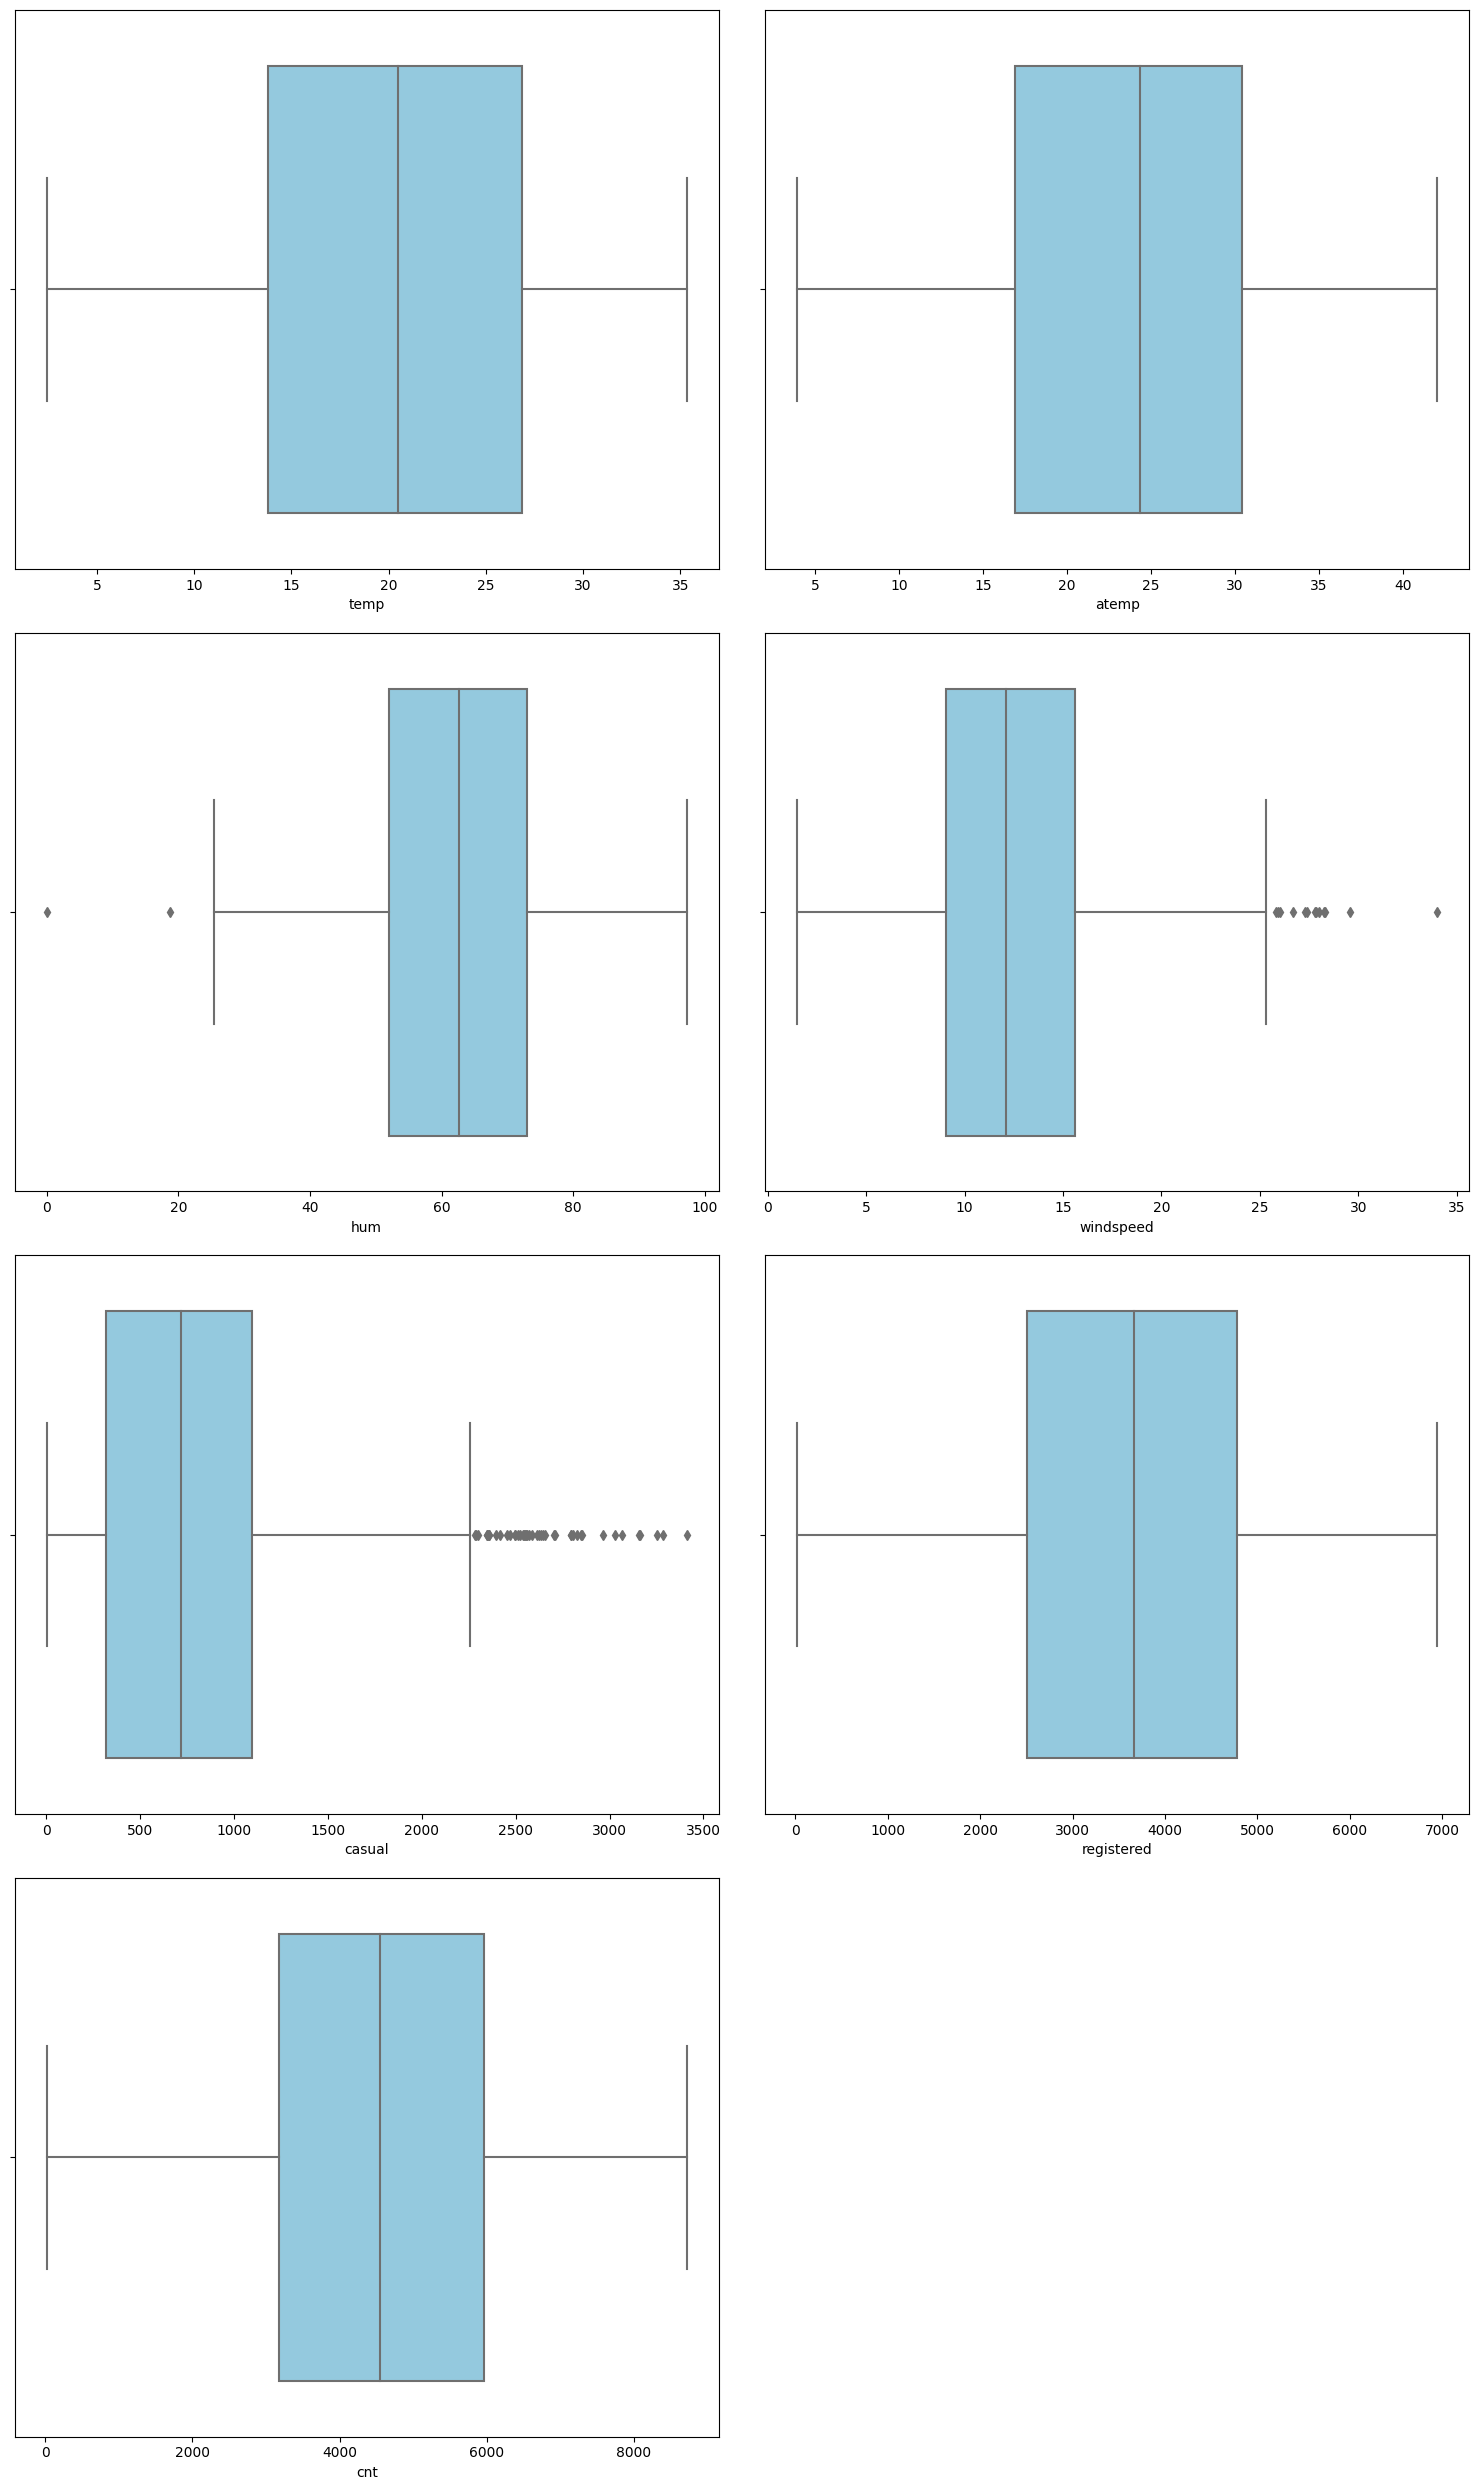

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data = df, ax=axes[indice], color = "skyblue"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [27]:
df["casual"].value_counts()

120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64

In [29]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [30]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [31]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

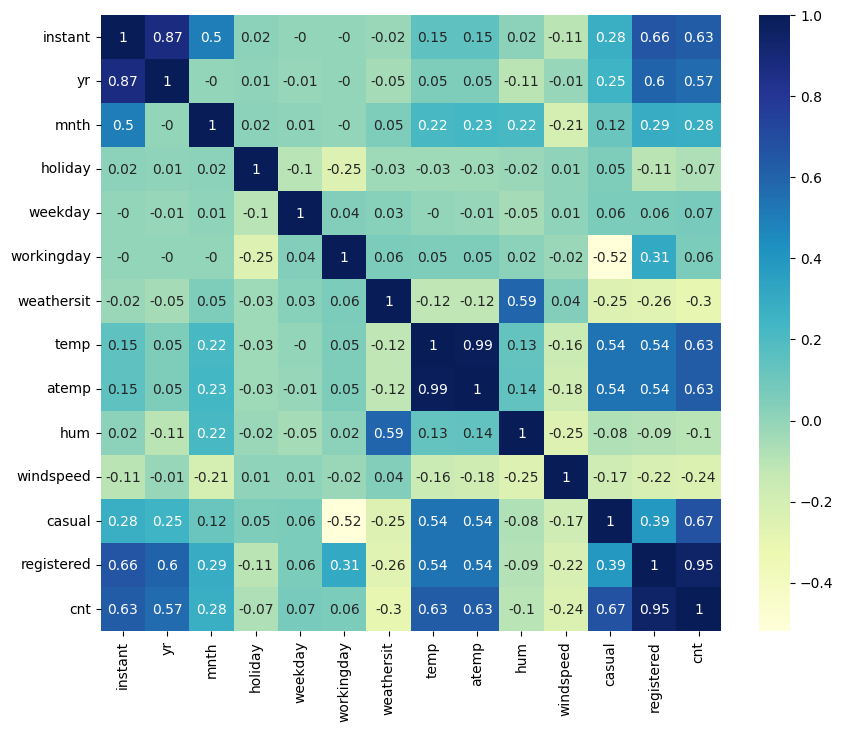

In [32]:
sns.heatmap(round(df.corr(),2), 
           cmap = "YlGnBu",
           annot = True);

El número de bicicletas alquiladas al día varía según:
_______________________________________________________________________________________________________
- Si es un festivo o no
- Según la temperatura, frío que pela.
- El año para los registrados.
Hipótesis: registrados tienen el hábito de usar la bici
- Los casuales cogen más bicicletas en fines de semana que entre semana.

Diferencia en usuarios casuales en función de si es o no día laborable.


Variable respuesta ==> cnt: count of total rental bikes including both casual and registered

## Renombrar columnas

In [33]:
df.reset_index(inplace=True)

In [35]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

In [36]:
df.rename(columns = cambio_columnas, inplace=True)

In [37]:
df.columns

Index(['index', 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')